<a href="https://colab.research.google.com/github/Unkid/rts/blob/master/fasion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras
import keras.backend as K

import matplotlib.pyplot as plt
import numpy as np

In [0]:
batch_size = 512
num_classes = 10
epochs = 10

In [42]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

img_rows = 28
img_cols = 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('data train shape: {0}, label train shape: {1}'.format(x_train.shape, y_train.shape))
print('data test shape: {0}, label test shape: {1}'.format(x_test.shape, y_test.shape))

data train shape: (60000, 28, 28, 1), label train shape: (60000,)
data test shape: (10000, 28, 28, 1), label test shape: (10000,)


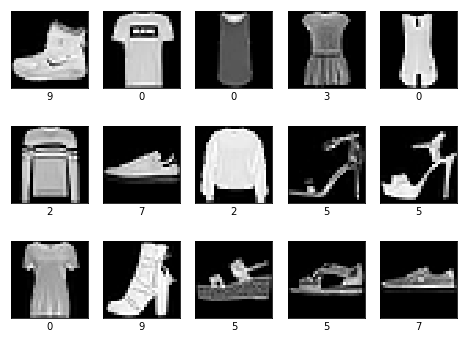

In [43]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_xlabel(y_train[i])
    ax.imshow(x_train[i,:,:,0], cmap='gray')

In [44]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0.0 1.0
0.0 1.0


In [45]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
model = Sequential()
#model.add(Conv2D(32, kernel_size=(5, 5),
                 #activation='relu',
                 #input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(64, (5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten(input_shape=input_shape))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])

In [55]:

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3
                    )

score = model.evaluate(x_test, y_test, verbose=0)
print('\n\nTest loss:', score[0])
print('Test accuracy:', score[1])

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 57us/step - loss: 0.8555 - acc: 0.7028 - val_loss: 0.5381 - val_acc: 0.8149
Epoch 2/10
42000/42000 [==============================] - 2s 40us/step - loss: 0.5473 - acc: 0.8123 - val_loss: 0.4678 - val_acc: 0.8349
Epoch 3/10
42000/42000 [==============================] - 2s 40us/step - loss: 0.4862 - acc: 0.8316 - val_loss: 0.4246 - val_acc: 0.8504
Epoch 4/10
42000/42000 [==============================] - 2s 41us/step - loss: 0.4492 - acc: 0.8429 - val_loss: 0.4061 - val_acc: 0.8533
Epoch 5/10
42000/42000 [==============================] - 2s 40us/step - loss: 0.4198 - acc: 0.8517 - val_loss: 0.4046 - val_acc: 0.8534
Epoch 6/10
42000/42000 [==============================] - 2s 40us/step - loss: 0.4103 - acc: 0.8530 - val_loss: 0.3788 - val_acc: 0.8631
Epoch 7/10
42000/42000 [==============================] - 2s 41us/step - loss: 0.3980 - acc: 0.8590 - val_loss: 0.3752 - val_acc

In [0]:
def plot_history(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

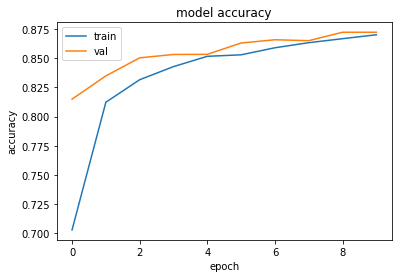

In [57]:
plot_history(history)

[2]


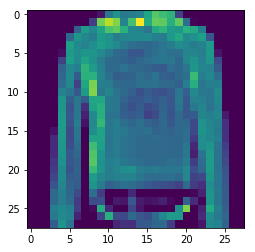

In [58]:
plt.imshow(x_test[16,:,:,0])
pred_class = model.predict_classes(x_test[16].reshape(-1, 28, 28, 1))
print(pred_class)

In [61]:
model.save('my_model.h5')

saved_model = keras.models.load_model('my_model.h5')
pred_class = saved_model.predict_classes(x_test[16].reshape(-1, 28, 28, 1))
print(pred_class)

[2]
